# Exploratory Data Analysis: (dataset1) & Student Alcohol Consumption

**Group Number:** 97  
**Members:** Roy Rui #300176548 || Jiayi Ma
 



## Introduction (Draft)
The purpose of this report is to ______________
- **Educators** who want to understand student learning patterns.
- **School administrators** aiming to improve academic performance.
- **Researchers** analyzing student behavior.

We will provide **10 key insights** from our dataset, using Python for data analysis.

## Dataset I: 

## Dataset II: Student Alcohol Consumption
**Author**: UCI Machine Learning · Dmitrii Batogov  
**Ref**: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption  
**Shape**: Main set (*student_por.csv*): **33 Columns 649 Rows** / with another merged set (*common_students.csv*) of **53 Columns 383 Rows**  
**Description**:  
| Feature       | Description  | Data Type   |
|--------------|-------------|-------------|
| **school**   | Student's school (GP: Gabriel Pereira, MS: Mousinho da Silveira) | Categorical |
| **sex**      | Gender (F: Female, M: Male) | Categorical |
| **age**      | Student's age (15-22) | Numerical |
| **address**  | Home location (U: Urban, R: Rural) | Categorical |
| **famsize**  | Family size (LE3: ≤3, GT3: >3) | Categorical |
| **Pstatus**  | Parent's cohabitation status (T: Together, A: Apart) | Categorical |
| **Medu**     | Mother's education (0-4) | Numerical |
| **Fedu**     | Father's education (0-4) | Numerical |
| **Mjob**     | Mother's job (Teacher, Health, Services, At_home, Other) | Categorical |
| **Fjob**     | Father's job (Teacher, Health, Services, At_home, Other) | Categorical |
| **reason**   | Reason for choosing this school (Home, Reputation, Course, Other) | Categorical |
| **guardian** | Student’s guardian (Mother, Father, Other) | Categorical |
| **traveltime** | Travel time to school (1-4, higher = longer) | Numerical |
| **studytime** | Weekly study time (1-4, higher = more) | Numerical |
| **failures** | Past class failures (0-4) | Numerical |
| **schoolsup** | Extra educational support (Yes/No) | Categorical |
| **famsup**   | Family educational support (Yes/No) | Categorical |
| **paid**     | Extra paid classes (Yes/No) | Categorical |
| **activities** | Extra-curricular activities (Yes/No) | Categorical |
| **nursery**  | Attended nursery school (Yes/No) | Categorical |
| **higher**   | Plans for higher education (Yes/No) | Categorical |
| **internet** | Internet access at home (Yes/No) | Categorical |
| **romantic** | In a romantic relationship (Yes/No) | Categorical |
| **famrel**   | Family relationship quality (1-5) | Numerical |
| **freetime** | Free time after school (1-5) | Numerical |
| **goout**    | Going out with friends (1-5) | Numerical |
| **Dalc**     | Workday alcohol consumption (1-5) | Numerical |
| **Walc**     | Weekend alcohol consumption (1-5) | Numerical |
| **health**   | Current health status (1-5) | Numerical |
| **absences** | Number of school absences (0-93) | Numerical |
| **G1**       | First period grade (0-20) | Numerical |
| **G2**       | Second period grade (0-20) | Numerical |
| **G3**       | Final grade (0-20, target variable) | Numerical |

*Note that for the merged set, a special identifier **"_math"** and **"_por"** is used for distinguishing student records from the Math and Portuguese datasets. This ensures that attributes such as **G1, G2, G3, etc.** are correctly assigned to their respective courses without conflicts.*  
*As description on Kaggle states, "There are several (382) students that belong to both datasets，tthese students can be identified by searching for identical attributes," we verified that this is true. However, It is a bit irrational for certain columns not being identifier for identical students, we don't know why.*





**Initialization**

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset II**  
**Dataset Population**

In [74]:
# Load the datasets
student_mat = pd.read_csv("dataset2/student-mat.csv", sep=",")
student_por = pd.read_csv("dataset2/student-por.csv", sep=",")

# Define full matching columns (excluding G1, G2, G3)
matching_columns = [
    "school","sex","age","address","famsize","Pstatus",
    "Medu","Fedu","Mjob","Fjob","reason","nursery","internet"
]

# Merge common students using identifier columns, suffixes for duplicate columns.
common_students = pd.merge(
    student_mat,
    student_por,
    on=matching_columns,
    suffixes=("_math", "_por")
)

# Save the dataset and verify the number of common students
# common_students.to_csv("dataset2/common_students.csv", index=False)
# print(f"Total common students: {common_students.shape[0]}")

## Insight 1: Grade Distribution in Math (r1)

### **a. Insight Statement**
> Math grades (`G3`) are concentrated around **10-15**, with fewer students achieving extreme scores.

---

### **b. Supporting Evidence**
The histogram below visualizes the grade distribution.  
**X-Axis:** *Final Grade (G3)* | **Y-Axis:** *Frequency*  
KDE curve highlights trends.

---

### **c. Type of Analysis**
**Statistical Distribution Analysis**  
- Used a **histogram with KDE** to analyze grade dispersion. 

### **d. Reproducible Code**

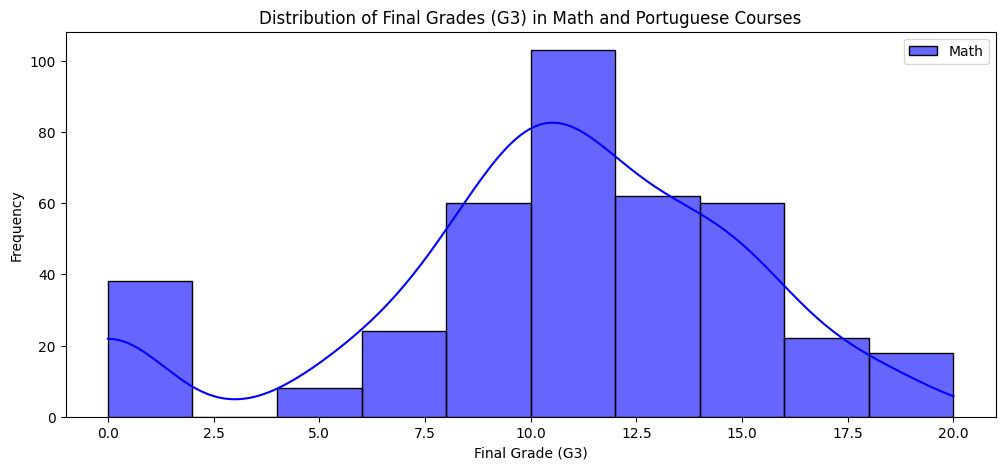

In [75]:
plt.figure(figsize=(12,5))

# Plot histogram for Math Grades (G3)
sns.histplot(student_mat["G3"], bins=10, kde=True, color="blue", label="Math", alpha=0.6)

# Plot histogram for Portuguese Grades (G3)
# sns.histplot(student_por["G3"], bins=10, kde=True, color="red", label="Portuguese", alpha=0.6)

# Labels and Title
plt.xlabel("Final Grade (G3)")
plt.ylabel("Frequency")
plt.title("Distribution of Final Grades (G3) in Math and Portuguese Courses")
plt.legend()

# Show the plot
plt.show()

## Insight 2: Gender Differences in Weekend Alcohol Consumption (r2)

### **a. Insight Statement**
> Male students tend to have lower weekend alcohol consumption levels compared to female students, as seen in the distribution.

---

### **b. Supporting Evidence**
The countplot below visualizes the frequency of students consuming alcohol on weekends based on gender.  
**X-Axis:** *Weekend Alcohol Consumption (1 - 5)* | **Y-Axis:** *Count*  
The count distribution shows that more male students have lower alcohol consumption levels (1-2), while female students tend to have higher consumption levels (3-5).

---

### **c. Type of Analysis**
**Categorical Frequency Analysis**  
- Used a **countplot with hue ("sex")** to analyze gender differences in alcohol consumption.  
- Applied **Seaborn's "deep" color palette** for improved clarity.

---

### **d. Reproducible Code**


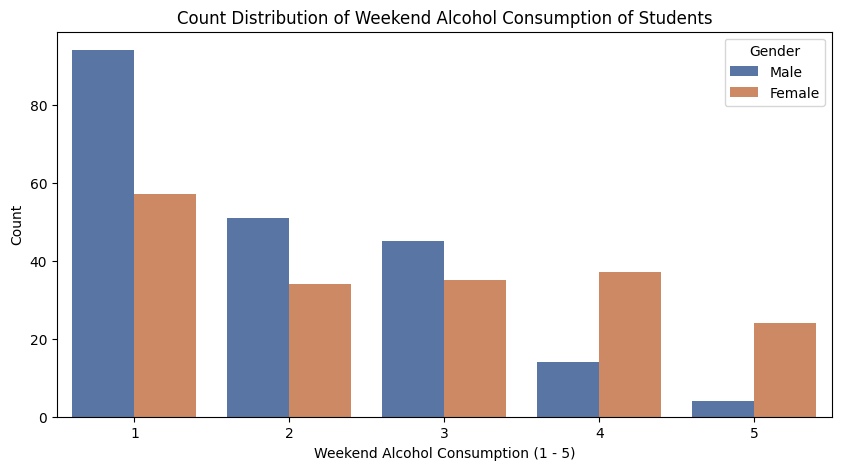

In [76]:
# Create figure
plt.figure(figsize=(10,5))


# Corrected Countplot with hue
sns.countplot(x="Walc", data=student_mat, hue="sex", palette="deep")

# Labels and Title
plt.xlabel("Weekend Alcohol Consumption (1 - 5)")
plt.ylabel("Count")
plt.title("Count Distribution of Weekend Alcohol Consumption of Students")

# Add legend manually
plt.legend(title="Gender", labels=["Male", "Female"])

# Show plot
plt.show()